# Disciplines Analysis

Notebook will focus on how varied the disciplines are in the hand mapped (ouch) dataset that I went and created by hand (ouch^2).

I think in general a couple of quick breakdowns and maybe some pairwise indpendance tests might be worth investigating?

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
from scipy.stats import chi2_contingency
import numpy as np

%matplotlib inline
warnings.filterwarnings('ignore')  # gets rid of agitating boxes by plots

## Read in / cleaining sort of

first we'll just access the data and clean the NULLs since we know they're structured such that NULLs indicate a lack of specialism in the 'primary_discipline' column, or a lack of proof of knowledge in the rest. 

In [4]:
df = pd.read_csv('../data/disciplines_breakdown.csv')

df['primary_discipline'].fillna('mixed', inplace=True)
df.fillna(0, inplace=True)  # only remaining nulls will be in int columns...

float_cols = df.select_dtypes(include=[float]).columns
df[float_cols] = df[float_cols].astype(int)  # makes the binary a bit nicer to look at

df.head()

fighter primary_discipline  boxer  wrestler  thai_boxer  \
0   Alistair Overeem         kickboxing      0         0           1   
1     Cory Sandhagen         kickboxing      0         0           0   
2  Alexandre Pantoja              mixed      0         0           0   
3     Diego Ferreira          jiu jitsu      0         0           0   
4    Michael Johnson          wrestling      1         1           0   

   kickboxer  karateka  judoka  mixed_martial_artist  taekwondoin  \
0          1         0       1                     0            0   
1          1         0       0                     0            0   
2          0         0       0                     1            0   
3          0         0       0                     0            0   
4          0         0       0                     1            0   

   kung_fu_jia  jiujitiero  sambo_practitioner  g_in_a_gi  capoeira_artist  
0            0           1                   0          0                0  
1            0           1                   0          0                0  
2            0           1                   0          0                0  
3            0           1                   0          0                1  
4            0           0                   0          0                0

safe aight, now to get started with the analysis lets do a quick couple of graphs displaying the 'primary_discipline' breakdown. first lets have a gander...

In [30]:
pd.DataFrame(df['primary_discipline'].value_counts())

primary_discipline
mixed                      755
wrestling                  265
jiu jitsu                  219
boxing                      86
kickboxing                  76
muay thai                   69
karate                      68
judo                        51
taekwondo                   37
sambo                       25
kung fu                     15
capoeira                     5
wrestler                     4
jiuu jitsu                   1
jiu jistu                    1
muy thai                     1

lol classic dyslexic Johnno. The last couple clearly need cleaning first, but once thats done should be a fairly trivial plot, even if it is likely to be utterly dominated by the 'mixed' column...

In [5]:
df.replace({'primary_discipline': {'wrestler': 'wrestling',
                                   'jiuu jitsu': 'jiu jitsu',
                                   'jiu jistu': 'jiu jitsu',
                                   'muy thai': 'muay thai'}
           },
           inplace=True)

df.to_csv('../data/disciplines_breakdown.csv', index=False)

safe aight, guess we'll start with a barplot / pie chart breakdown for now then...

## primary_disciplines breakdown

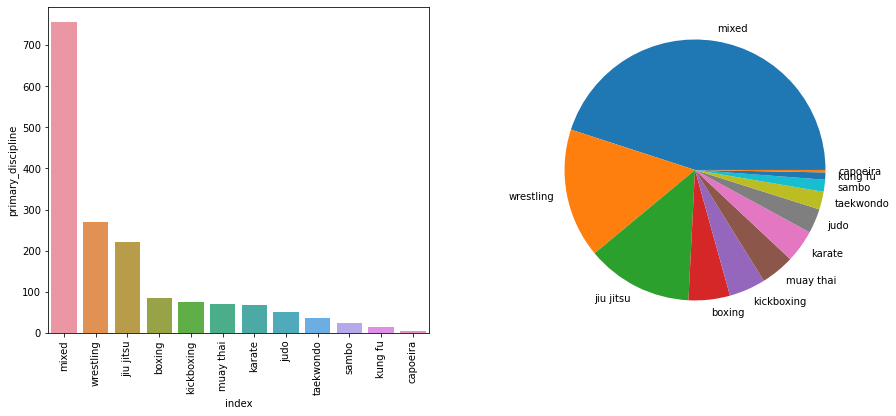

In [71]:
primaries = pd.DataFrame(df['primary_discipline'].value_counts()).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

bars = sns.barplot(primaries['index'], primaries['primary_discipline'], ax=ax[0])
ax[1] = plt.pie(primaries['primary_discipline'], labels=primaries['index'])

plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)
plt.show()

semi supprised at the number of boxers to be fair, though this could be inflated to some degree by kickboxers being split between 'kickboxing' and 'muay thai' (to a lesser extent other striking arts i.e. taekwondo / karate too). The kung-fu size is higher than it realistically should as the label kung fu is a bit all encompassing in a way that most of the other arts aren't, for instance wing chun vs wushu are quite different arts. Wrestling is also to some extent inflated beyond what you might expect due to the sheer number of people who have a background wrestling in college from the USA. Most of these fighters probably arent at the highest level of the sport.

guess next up w can look at the distributions of each art occuring

## art occurances

<AxesSubplot:>

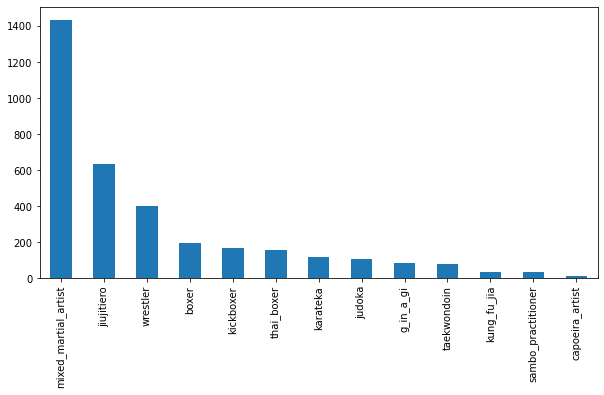

In [82]:
occurances = df.select_dtypes(include=int).sum()
occurances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

shame to see legit arts like taekwondo fall beneath 'G in a gi' :(.

initially interesting to see jiujitiero outpreform wrestler but I guess people will more often pick up jitsu to round out a striking game and accept the wrestlefucking than they will pick up wrestling later in their lives so it does make some amount of intuitive sense. From memory, I also felt like jiu jitsu was the art which least frequently explored other arts so youd be more likely to get pure jitsu artists than other things but might be worth comfirming that. A good idea might be to look at the probability that a person with a given specialism also trains in each other art form. I can do that with a group / mean calculation...

## probability distributions

In [7]:
probs = df.groupby('primary_discipline').mean()
probs

boxer  wrestler  thai_boxer  kickboxer  karateka  \
primary_discipline                                                        
boxing              1.000000  0.255814    0.069767   0.081395  0.058140   
capoeira            0.000000  0.200000    0.200000   0.000000  0.000000   
jiu jitsu           0.076923  0.149321    0.072398   0.049774  0.063348   
judo                0.117647  0.235294    0.078431   0.098039  0.078431   
karate              0.132353  0.176471    0.088235   0.117647  0.985294   
kickboxing          0.197368  0.092105    0.131579   1.000000  0.078947   
kung fu             0.200000  0.333333    0.133333   0.333333  0.000000   
mixed               0.031788  0.034437    0.027815   0.026490  0.018543   
muay thai           0.128571  0.071429    1.000000   0.257143  0.014286   
sambo               0.120000  0.360000    0.120000   0.080000  0.000000   
taekwondo           0.162162  0.054054    0.081081   0.216216  0.162162   
wrestling           0.078067  1.000000    0.059480   0.022305  0.014870   

                      judoka  mixed_martial_artist  taekwondoin  kung_fu_jia  \
primary_discipline                                                             
boxing              0.023256              0.837209     0.011628     0.023256   
capoeira            0.000000              0.400000     0.000000     0.000000   
jiu jitsu           0.085973              0.737557     0.027149     0.027149   
judo                1.000000              0.647059     0.098039     0.019608   
karate              0.058824              0.602941     0.044118     0.000000   
kickboxing          0.039474              0.789474     0.065789     0.013158   
kung fu             0.000000              0.800000     0.000000     1.000000   
mixed               0.017219              0.980132     0.021192     0.007947   
muay thai           0.042857              0.728571     0.028571     0.000000   
sambo               0.080000              0.640000     0.000000     0.000000   
taekwondo           0.054054              0.675676     1.000000     0.081081   
wrestling           0.029740              0.817844     0.014870     0.007435   

                    jiujitiero  sambo_practitioner  g_in_a_gi  capoeira_artist  
primary_discipline                                                              
boxing                0.244186            0.000000   0.116279         0.000000  
capoeira              0.600000            0.000000   0.200000         1.000000  
jiu jitsu             1.000000            0.009050   0.022624         0.022624  
judo                  0.431373            0.039216   0.058824         0.000000  
karate                0.470588            0.000000   0.014706         0.029412  
kickboxing            0.302632            0.026316   0.144737         0.000000  
kung fu               0.600000            0.000000   0.200000         0.000000  
mixed                 0.206623            0.003974   0.043709         0.000000  
muay thai             0.471429            0.014286   0.057143         0.028571  
sambo                 0.080000            1.000000   0.080000         0.000000  
taekwondo             0.459459            0.000000   0.054054         0.000000  
wrestling             0.356877            0.000000   0.037175         0.003717

lol @ kung fu being one of two arts with highest g in a gi propensity.

I guess it might be interesting from here to start looking at how we can group these arts to some extent. first up because its fresh in my mind from work I guess we can try a pairwise chi squared test of independance to see if any of the arts in the breadown end up not hugely mattering

## chi squared test 

In [27]:
def chi2_test_pairwise(
    df: pd.DataFrame,
    pair_col: str,
) -> pd.DataFrame:
    """Preform pairwise chi squared tests within a given column.
    
    Parameters
    ----------
    df : Dataframe with a column defining groups and the remaininh columns numeric.
    pair_col : Column defining groups in df.
    
    Returns
    -------
    Results of pairwise chi squared test.
    """
    results = []

    disciplines = list(df[pair_col].unique())
    discipline_pairs = itertools.combinations(disciplines, 2)

    for pair in discipline_pairs:
        prob_cont = df[df[pair_col].isin(pair)]
        prob_cont.drop(pair_col, axis=1, inplace=True)
        prob_cont += 1  # add one persons worth of weight to everything
        
        chi2_results = chi2_contingency(prob_cont)

        results.append((pair[0], pair[1], chi2_results[1], chi2_results[2]))
    
    results = pd.DataFrame(results)
    results.columns = ['art1', 'art2', 'p_val', 'dof']
        
    return results


counts = df.groupby('primary_discipline').sum()
counts.reset_index(inplace=True)
test = chi2_test_pairwise(counts, 'primary_discipline')
test.sort_values(by='p_val')

art1       art2         p_val  dof
59     mixed  wrestling  2.443966e-90   12
40    karate      mixed  2.194636e-74   12
57     mixed      sambo  2.575166e-74   12
6     boxing      mixed  1.027123e-66   12
56     mixed  muay thai  1.241128e-66   12
..       ...        ...           ...  ...
53   kung fu      sambo  1.866975e-05   12
12  capoeira       judo  3.117515e-05   12
19  capoeira  taekwondo  2.450789e-04   12
18  capoeira      sambo  4.892066e-03   12
15  capoeira    kung fu  7.503105e-02   12

[66 rows x 4 columns]

so litterally everything gets rejected at all levels. guess thats kind of reassuring about the differences in the arts though?
For an extra layer of tests, Ill try grouping the arts into 'striking', 'grappling', 'wrestling' and 'mixed' and seeing if that adds anny further info for me. I wonder if capoeira being the closest to success is just because there are so few capoeira artists out there? or even that that tends towards whatever the 'default' regime might be since its martially fairly useless?

In [37]:
counts['striking'] = counts[['boxer', 
                             'thai_boxer',
                             'kickboxer', 
                             'karateka',
                             'taekwondoin', 
                             'kung_fu_jia']].sum(axis=1)
counts['wrestling'] = counts[['wrestler',
                             'sambo_practitioner',
                             'judoka']].sum(axis=1)
counts['grappling'] = counts[['jiujitiero']]

grouped_art = counts[['primary_discipline', 'striking', 'wrestling', 'grappling']]
test2 = chi2_test_pairwise(grouped_art, 'primary_discipline')
test2['5_perc_sig'] = np.where(test2['p_val'] <= 0.05, 1, 0)

test2[test2['5_perc_sig'] == 0].sort_values(by='p_val')

art1        art2     p_val  dof  5_perc_sig
20    capoeira   wrestling  0.066036    2           0
13    capoeira      karate  0.068364    2           0
12    capoeira        judo  0.105138    2           0
3       boxing      karate  0.120773    2           0
4       boxing  kickboxing  0.136219    2           0
15    capoeira     kung fu  0.152380    2           0
38      karate  kickboxing  0.168512    2           0
54     kung fu   taekwondo  0.212173    2           0
45  kickboxing     kung fu  0.214262    2           0
47  kickboxing   muay thai  0.248950    2           0
43      karate   taekwondo  0.263422    2           0
52     kung fu   muay thai  0.306044    2           0
5       boxing     kung fu  0.325305    2           0
41      karate   muay thai  0.365420    2           0
49  kickboxing   taekwondo  0.510481    2           0
16    capoeira       mixed  0.668120    2           0
11    capoeira   jiu jitsu  0.694904    2           0
61   muay thai   taekwondo  0.813632    2           0
39      karate     kung fu  0.880265    2           0

so for the msot part we see striking arts behave similarly when we group the arts together, whilst nothing else really matches up. I'm supprised at the amount of failure to rejects we seem to get for capoeira since that just like a weird dance more than anything but other than that nothing is especially supprising to me here. I am going to briefly add the 'striking' and 'wrestling' columns to the base df though, as they may be of use. 'wrestling' is going to need a different, more descriptive name though...

In [36]:
df['striking_arts'] = df[['boxer', 
                          'thai_boxer',
                          'kickboxer', 
                          'karateka',
                          'taekwondoin', 
                          'kung_fu_jia']].sum(axis=1)
df['wrestling_arts'] = df[['wrestler',
                           'sambo_practitioner',
                           'judoka']].sum(axis=1)
df.to_csv('../data/disciplines_breakdown.csv', index=False)